<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Odisha/bjpOdisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 620 (delta 92), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (620/620), 31.00 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [3]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp odisha"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_odisha.csv',index = False)

Streaming output truncated to the last 5000 lines.
2
2020-11-21 18:39:31
1330219307989610497
False
@JagiPanda @sardesairajdeep @vikramchandra @ARanganathan72 @ShekharGupta @soniandtv @sagarikaghose @aroonpurie @pratyasharath @UnSubtleDesi @rahulroushan @TimesNow @g_smita @thewire_in @AartiTikoo @chitraSD BJP is trying to push @CMO_Odisha by CBI, and BJD is trying to do the same with state police.

All political parties are similar.

Still, we can expect a better output from our judicial system.

U do some sting operations &amp; prove ur innocence.
Suchism73283824

Twitter Web App
1
13
55
0
<--------------------------------------------------->
3
2020-11-21 18:33:24
1330217767358836738
False
@Asishmo28323397 @tweetsbyparija No denying the stellar work done by Navin. Point is BJP has made inroads in Odisha and has grown in many places unthinkable before 2014
rickyjana
Bengaluru/Kolkata
Twitter for Android
0
449
916
0
<--------------------------------------------------->
4
2020-11-21 18:26

In [4]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       347 non-null    datetime64[ns]
 1   Tweet_id   347 non-null    int64         
 2   Verified   347 non-null    bool          
 3   Tweet      347 non-null    object        
 4   User       347 non-null    object        
 5   Location   347 non-null    object        
 6   Source     347 non-null    object        
 7   Likes      347 non-null    int64         
 8   Followers  347 non-null    int64         
 9   Following  347 non-null    int64         
 10  Retweets   347 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 27.6+ KB


In [6]:
df.shape

(347, 11)

In [8]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [9]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [10]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [11]:
df['Source'].value_counts()

Twitter for Android    200
Twitter Web App         94
Twitter for iPhone      32
WordPress.com            5
TweetDeck                5
cmssocialservice         3
Periscope                2
ht-twitter-handler       2
Buffer                   1
Jenkers Eng Posting      1
Twitter for iPad         1
South Asian News         1
Name: Source, dtype: int64

In [12]:
df['Location'].nunique()

109

In [13]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

347

In [14]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


342

In [15]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [16]:
df['Tweet'].duplicated().sum()

5

In [17]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(342, 11)

In [18]:
df['Tweet'].duplicated().sum()

0

In [19]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [20]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [21]:
df.shape

(342, 12)

In [22]:
df['Processed_Tweet']

0      @Shehzad_Ind @otvnews @JagiPanda @PandaJay BJP...
1      @dpradhanbjp @narendramodi You and Lekhashri a...
2      @JagiPanda @sardesairajdeep @vikramchandra @AR...
3      @Asishmo28323397 @tweetsbyparija No denying th...
4      @ARanganathan72 @otvnews @JagiPanda The day na...
                             ...                        
337    What's the point telling people XYZ difference...
338    Thank you to  every BJP leaders Odisha new pra...
339    @otvnews BJP unable to catch nerves of people ...
340    Thank you sir for all your good work making BJ...
341    @sanjaykhilar @AskLipun @GormentDr Even Bangla...
Name: Processed_Tweet, Length: 342, dtype: object

In [23]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @Shehzad_Ind @otvnews @JagiPanda @PandaJay BJP...
1      @dpradhanbjp @narendramodi You and Lekhashri a...
2      @JagiPanda @sardesairajdeep @vikramchandra @AR...
3      @Asishmo28323397 @tweetsbyparija No denying th...
4      @ARanganathan72 @otvnews @JagiPanda The day na...
                             ...                        
337    What's the point telling people XYZ difference...
338    Thank you to  every BJP leaders Odisha new pra...
339    @otvnews BJP unable to catch nerves of people ...
340    Thank you sir for all your good work making BJ...
341    @sanjaykhilar @AskLipun @GormentDr Even Bangla...
Name: Processed_Tweet, Length: 342, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0              BJP needs to invest and put a CM candi...
1          You and Lekhashri are one of the key perso...
2                                      BJP is trying ...
3          No denying the stellar work done by Navin....
4            The day national media turns its focus o...
                             ...                        
337    What's the point telling people XYZ difference...
338    Thank you to  every BJP leaders Odisha new pra...
339       BJP unable to catch nerves of people of odisha
340    Thank you sir for all your good work making BJ...
341          Even Bangladesh fields their best captai...
Name: Processed_Tweet, Length: 342, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0              BJP needs to invest and put a CM candi...
1          You and Lekhashri are one of the key perso...
2                                      BJP is trying ...
3          No denying the stellar work done by Navin....
4            The day national media turns its focus o...
                             ...                        
337    What's the point telling people XYZ difference...
338    Thank you to  every BJP leaders Odisha new pra...
339       BJP unable to catch nerves of people of odisha
340    Thank you sir for all your good work making BJ...
341          Even Bangladesh fields their best captai...
Name: Processed_Tweet, Length: 342, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0              BJP needs to invest and put a CM candi...
1          You and Lekhashri are one of the key perso...
2                                      BJP is trying ...
3          No denying the stellar work done by Navin....
4            The day national media turns its focus o...
                             ...                        
337    What's the point telling people XYZ difference...
338    Thank you to  every BJP leaders Odisha new pra...
339       BJP unable to catch nerves of people of odisha
340    Thank you sir for all your good work making BJ...
341          Even Bangladesh fields their best captai...
Name: Processed_Tweet, Length: 342, dtype: object

In [27]:
!pip install tweet-preprocessor

In [28]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      BJP needs to invest and put a CM candidate lik...
1      You and Lekhashri are one of the key person " ...
2      BJP is trying to push by CBI, and BJD is tryin...
3      No denying the stellar work done by Navin. Poi...
4      The day national media turns its focus on Odis...
                             ...                        
337    What's the point telling people XYZ difference...
338    Thank you to every BJP leaders Odisha new prab...
339       BJP unable to catch nerves of people of odisha
340    Thank you sir for all your good work making BJ...
341    Even Bangladesh fields their best captain agai...
Name: Processed_Tweet, Length: 342, dtype: object

In [29]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      BJP needs to invest and put a CM candidate lik...
1      You and Lekhashri are one of the key person   ...
2      BJP is trying to push by CBI  and BJD is tryin...
3      No denying the stellar work done by Navin  Poi...
4      The day national media turns its focus on Odis...
                             ...                        
337    What s the point telling people XYZ difference...
338    Thank you to every BJP leaders Odisha new prab...
339       BJP unable to catch nerves of people of odisha
340    Thank you sir for all your good work making BJ...
341    Even Bangladesh fields their best captain agai...
Name: Processed_Tweet, Length: 342, dtype: object

In [30]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      bjp needs to invest and put a cm candidate lik...
1      you and lekhashri are one of the key person   ...
2      bjp is trying to push by cbi  and bjd is tryin...
3      no denying the stellar work done by navin  poi...
4      the day national media turns its focus on odis...
                             ...                        
337    what s the point telling people xyz difference...
338    thank you to every bjp leaders odisha new prab...
339       bjp unable to catch nerves of people of odisha
340    thank you sir for all your good work making bj...
341    even bangladesh fields their best captain agai...
Name: Processed_Tweet, Length: 342, dtype: object

In [31]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'i want to bjp seat please help dear sir dear naveen ji'

In [32]:
df['User'].value_counts()

PrasantakDas97     17
otvnews            16
Congress300seat     8
OmmcomNews          5
kshitishdas         4
                   ..
sekardr_durai       1
VOXPopu03028596     1
rajeshmohanty_      1
jyotsnadevi33       1
ANI                 1
Name: User, Length: 250, dtype: int64

In [33]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


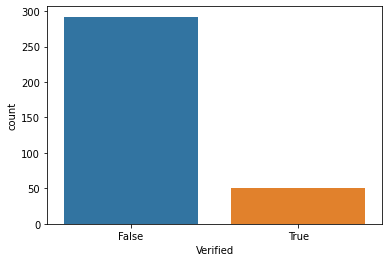

In [34]:
bar = sns.countplot(df['Verified'])

In [35]:
df['Verified'].value_counts()

False    292
True      50
Name: Verified, dtype: int64

In [36]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

otvnews            16
TOICitiesNews       3
BJP4India           2
HindustanTimes      2
BJPLive             2
TOIBhubaneswar      2
Sunil_Deodhar       2
timesofindia        1
mp_office           1
DDNewslive          1
AnilagrwalMPBJP     1
ShobhaBJP           1
thewire_in          1
ANI                 1
ians_india          1
Biswaranjaniyc      1
LalitenduBJP        1
mlasheetlapatel     1
PurandeswariBJP     1
OfficeofJPNadda     1
XpressOdisha        1
htTweets            1
MPRakeshSingh       1
svaradarajan        1
Outlookindia        1
SomParkashBJP       1
sambitswaraj        1
ttindia             1
Name: User, dtype: int64

In [37]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 8, 16: 35, 17: 126, 18: 36, 19: 41, 20: 38, 21: 58})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

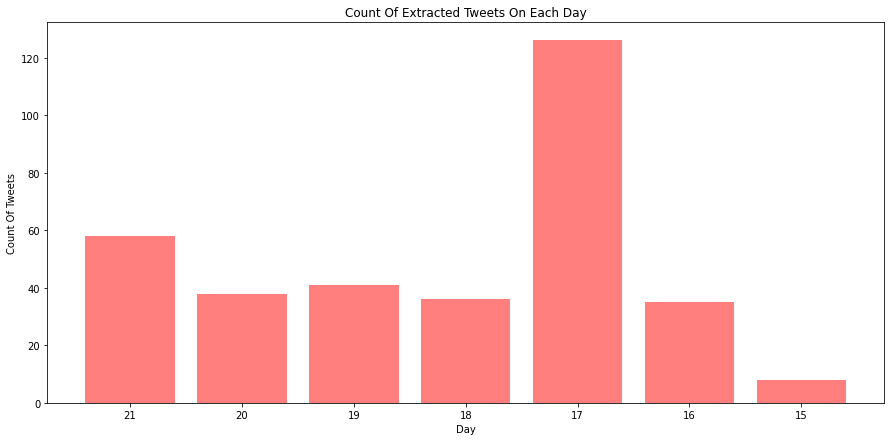

In [38]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [39]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({1: 6,
         2: 9,
         3: 9,
         4: 12,
         5: 16,
         6: 41,
         7: 21,
         8: 28,
         9: 21,
         10: 19,
         11: 16,
         12: 17,
         13: 23,
         14: 13,
         15: 19,
         16: 26,
         17: 22,
         18: 13,
         19: 6,
         20: 4,
         21: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

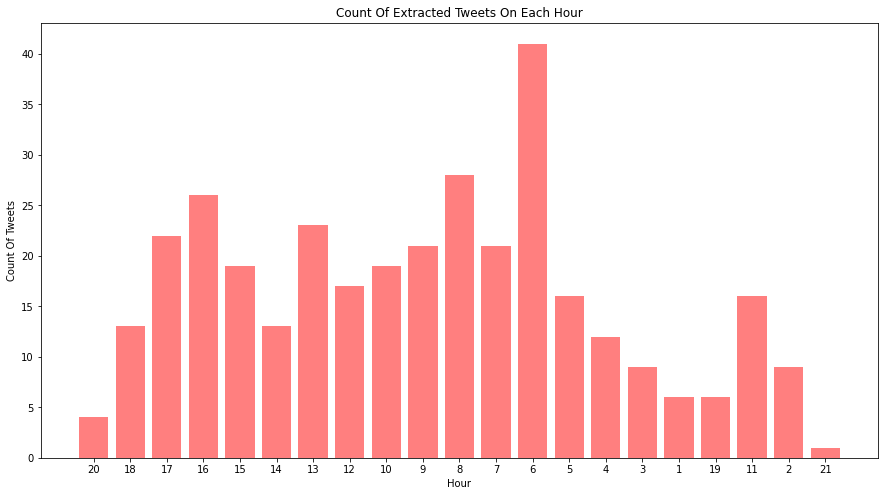

In [40]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [41]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['down', "you'll", 'themselves', 'here', "couldn't", 'hasn', "didn't", 'he', 'that', 'mightn', "don't", 'you', 'until', 'whom', 'most', 'an', 'off', 'own', 'through', 'now', 'these', 'd', "hasn't", 'under', 'him', "shan't", "you'd", 'ain', 'haven', 'don', 'which', 'while', 'his', 'herself', 'shouldn', 'm', 'some', "she's", 'this', 'once', 'has', 'doing', 'by', "that'll", 's', 'll', 'wasn', 'each', 'against', "doesn't", 'aren', 'or', 'shan', 'does', 'at', "you're", 'hers', 'any', 'to', 'its', 'below', 'about', 'their', 'ours', 'was', 'if', 'didn', 'do', 'couldn', 'should', 'doesn', 'no', 'but', 'hadn', 'because', 'more', "shouldn't", 'after', 'where', 'them', 'needn', "you've", 'our', 'the', "aren't", 'a', 'she', 'itself', 'those', "mightn't", "won't", 'me', 'only', 'is', 'be', 'too', "mustn't", 'won', 'were', 'both', 'my', 'are', 'myself', 'yours', 'and', 't', 'being', "should've", 'ma', 'as', 'very', 'than', 'few', 'have', 'in', 'during', "haven't", 'into', 'they', 'from', 'mustn', 'w

In [44]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      bjp needs invest put cm candidate like ms sara...
1      lekhashri one key person bjp sarkar failure od...
2      bjp trying push cbi bjd trying state police po...
3      denying stellar work done navin point bjp made...
4      day national media turns focus odisha corrupt ...
                             ...                        
337    point telling people xyz differences bjd bjp s...
338    thank every bjp leaders odisha new prabhari ch...
339                bjp unable catch nerves people odisha
340    thank sir good work making bjp consistently to...
341    even bangladesh fields best captain msd compar...
Name: Processed_Tweet, Length: 342, dtype: object

In [45]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [bjp, needs, invest, put, cm, candidate, like,...
1      [lekhashri, one, key, person, bjp, sarkar, fai...
2      [bjp, trying, push, cbi, bjd, trying, state, p...
3      [denying, stellar, work, done, navin, point, b...
4      [day, national, media, turns, focus, odisha, c...
                             ...                        
337    [point, telling, people, xyz, differences, bjd...
338    [thank, every, bjp, leaders, odisha, new, prab...
339         [bjp, unable, catch, nerves, people, odisha]
340    [thank, sir, good, work, making, bjp, consiste...
341    [even, bangladesh, fields, best, captain, msd,...
Name: Processed_Tweet, Length: 342, dtype: object

In [46]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [bjp, need, invest, put, cm, candid, like, ms,...
1      [lekhashri, one, key, person, bjp, sarkar, fai...
2      [bjp, tri, push, cbi, bjd, tri, state, polic, ...
3      [deni, stellar, work, done, navin, point, bjp,...
4      [day, nation, media, turn, focu, odisha, corru...
                             ...                        
337    [point, tell, peopl, xyz, differ, bjd, bjp, si...
338    [thank, everi, bjp, leader, odisha, new, prabh...
339             [bjp, unabl, catch, nerv, peopl, odisha]
340    [thank, sir, good, work, make, bjp, consist, t...
341    [even, bangladesh, field, best, captain, msd, ...
Name: Processed_Tweet, Length: 342, dtype: object

In [47]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 20:57:54,1330254132263989256,False,@Shehzad_Ind @otvnews @JagiPanda @PandaJay BJP...,KonarkRebuild,Delhi,Twitter Web App,0,22,39,0,"[bjp, need, invest, put, candid, like, sarangi..."
1,2020-11-21 20:09:38,1330241982699089924,False,@dpradhanbjp @narendramodi You and Lekhashri a...,sudhanshumunu,Bangalore,Twitter for Android,0,79,523,0,"[lekhashri, one, key, person, bjp, sarkar, fai..."
2,2020-11-21 18:39:31,1330219307989610497,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,Suchism73283824,,Twitter Web App,1,13,55,0,"[bjp, tri, push, cbi, bjd, tri, state, polic, ..."
3,2020-11-21 18:33:24,1330217767358836738,False,@Asishmo28323397 @tweetsbyparija No denying th...,rickyjana,Bengaluru/Kolkata,Twitter for Android,0,449,916,0,"[deni, stellar, work, done, navin, point, bjp,..."
4,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru..."
...,...,...,...,...,...,...,...,...,...,...,...,...
337,2020-11-15 17:05:43,1328021375072681984,False,What's the point telling people XYZ difference...,justlalit,Bharat,Twitter Web App,7,1202,489,2,"[point, tell, peopl, xyz, differ, bjd, bjp, si..."
338,2020-11-15 16:08:58,1328007092146298880,False,Thank you to every BJP leaders Odisha new pra...,ShridharSwain,"Boirani, India",Twitter for Android,1,1,32,0,"[thank, everi, bjp, leader, odisha, new, prabh..."
339,2020-11-15 14:51:22,1327987564947521536,False,@otvnews BJP unable to catch nerves of people ...,jmforindia,"Bhubaneshwar, India",Twitter for Android,0,38,132,0,"[bjp, unabl, catch, nerv, peopl, odisha]"
340,2020-11-15 13:51:26,1327972480804220928,False,Thank you sir for all your good work making BJ...,sangramstarts,"Bengaluru, India",Twitter for Android,1,285,605,0,"[thank, sir, good, work, make, bjp, consist, t..."


In [48]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

5633

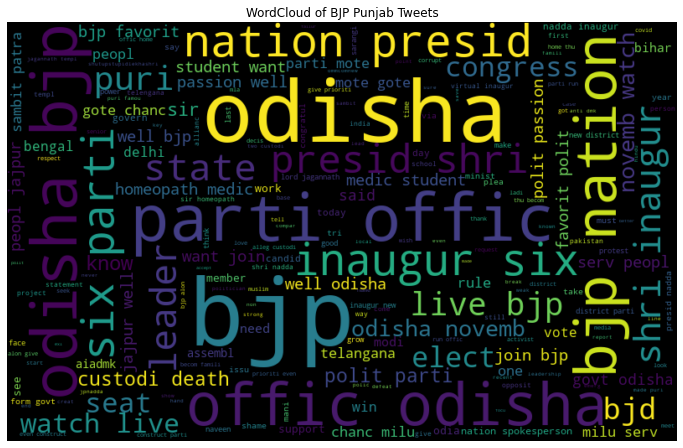

In [49]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of BJP Punjab Tweets")
plt.show()

In [50]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

342

In [51]:
len(text)

5633

In [52]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 156
Negative Tweets: 42
Neutral Tweets 144


In [53]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [55]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.760,0.240,0.7430
1,0.226,0.774,0.000,-0.6759
2,0.000,0.873,0.127,0.4404
3,0.000,1.000,0.000,0.0000
4,0.000,0.882,0.118,0.4939
...,...,...,...,...
337,0.143,0.717,0.140,-0.0258
338,0.000,0.815,0.185,0.3612
339,0.000,1.000,0.000,0.0000
340,0.000,0.441,0.559,0.9382


In [56]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.760,0.240,0.7430,Positive
1,0.226,0.774,0.000,-0.6759,Negative
2,0.000,0.873,0.127,0.4404,Positive
3,0.000,1.000,0.000,0.0000,Neutral
4,0.000,0.882,0.118,0.4939,Positive


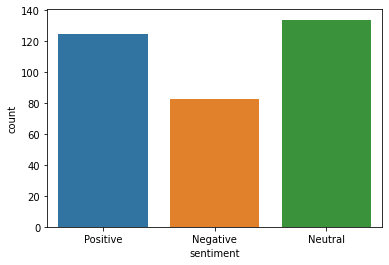

In [57]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [58]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Odisha/bjp_odisha.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

706

In [59]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [60]:
word_emotion=dict()
for i in range(0,706):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,342):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

In [61]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [64]:
df.Location  = df.Location.fillna('odisha')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [65]:
df.Location = df.Location.apply(lambda x: x.replace('odisha','orissa'))
df.Location.value_counts()

                            112
India                        22
Bhubaneswar, India           21
Bhubaneshwar, India          15
New Delhi, India             10
                           ... 
Berhampur, Odisha, India      1
الامارات العربية المتحدة      1
Gurgaon, India                1
Mumbai, India                 1
सुलतानपुर                     1
Name: Location, Length: 108, dtype: int64

In [66]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 20:57:54,1330254132263989256,False,@Shehzad_Ind @otvnews @JagiPanda @PandaJay BJP...,KonarkRebuild,Delhi,Twitter Web App,0,22,39,0,"[bjp, need, invest, put, candid, like, sarangi...",Delhi
1,2020-11-21 20:09:38,1330241982699089924,False,@dpradhanbjp @narendramodi You and Lekhashri a...,sudhanshumunu,Bangalore,Twitter for Android,0,79,523,0,"[lekhashri, one, key, person, bjp, sarkar, fai...",Bangalore
2,2020-11-21 18:39:31,1330219307989610497,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,Suchism73283824,,Twitter Web App,1,13,55,0,"[bjp, tri, push, cbi, bjd, tri, state, polic, ...",
3,2020-11-21 18:33:24,1330217767358836738,False,@Asishmo28323397 @tweetsbyparija No denying th...,rickyjana,Bengaluru/Kolkata,Twitter for Android,0,449,916,0,"[deni, stellar, work, done, navin, point, bjp,...",Bengaluru/Kolkata
4,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru...",Bengaluru
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2020-11-15 17:05:43,1328021375072681984,False,What's the point telling people XYZ difference...,justlalit,Bharat,Twitter Web App,7,1202,489,2,"[point, tell, peopl, xyz, differ, bjd, bjp, si...",Bharat
338,2020-11-15 16:08:58,1328007092146298880,False,Thank you to every BJP leaders Odisha new pra...,ShridharSwain,"Boirani, India",Twitter for Android,1,1,32,0,"[thank, everi, bjp, leader, odisha, new, prabh...",Boirani
339,2020-11-15 14:51:22,1327987564947521536,False,@otvnews BJP unable to catch nerves of people ...,jmforindia,"Bhubaneshwar, India",Twitter for Android,0,38,132,0,"[bjp, unabl, catch, nerv, peopl, odisha]",Bhubaneshwar
340,2020-11-15 13:51:26,1327972480804220928,False,Thank you sir for all your good work making BJ...,sangramstarts,"Bengaluru, India",Twitter for Android,1,285,605,0,"[thank, sir, good, work, make, bjp, consist, t...",Bengaluru


In [67]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [68]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 20:57:54,1330254132263989256,False,@Shehzad_Ind @otvnews @JagiPanda @PandaJay BJP...,KonarkRebuild,Delhi,Twitter Web App,0,22,39,0,"[bjp, need, invest, put, candid, like, sarangi...",Delhi,Positive,21
1,2020-11-21 20:09:38,1330241982699089924,False,@dpradhanbjp @narendramodi You and Lekhashri a...,sudhanshumunu,Bangalore,Twitter for Android,0,79,523,0,"[lekhashri, one, key, person, bjp, sarkar, fai...",Bangalore,Negative,21
2,2020-11-21 18:39:31,1330219307989610497,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,Suchism73283824,,Twitter Web App,1,13,55,0,"[bjp, tri, push, cbi, bjd, tri, state, polic, ...",,Positive,21
3,2020-11-21 18:33:24,1330217767358836738,False,@Asishmo28323397 @tweetsbyparija No denying th...,rickyjana,Bengaluru/Kolkata,Twitter for Android,0,449,916,0,"[deni, stellar, work, done, navin, point, bjp,...",Bengaluru/Kolkata,Neutral,21
4,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru...",Bengaluru,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


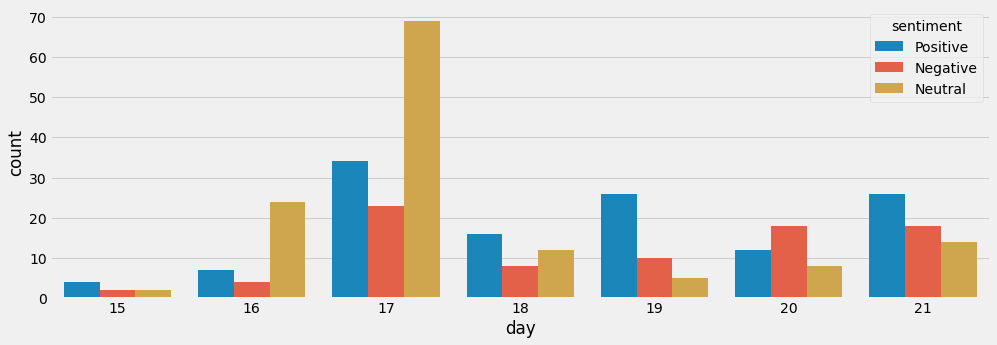

In [69]:
sns.countplot(df['day'],hue = df['sentiment'])

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [71]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 20:57:54,1330254132263989256,False,@Shehzad_Ind @otvnews @JagiPanda @PandaJay BJP...,KonarkRebuild,Delhi,Twitter Web App,0,22,39,0,"[bjp, need, invest, put, candid, like, sarangi...",Delhi,Positive,21,2
1,2020-11-21 20:09:38,1330241982699089924,False,@dpradhanbjp @narendramodi You and Lekhashri a...,sudhanshumunu,Bangalore,Twitter for Android,0,79,523,0,"[lekhashri, one, key, person, bjp, sarkar, fai...",Bangalore,Negative,21,0
2,2020-11-21 18:39:31,1330219307989610497,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,Suchism73283824,,Twitter Web App,1,13,55,0,"[bjp, tri, push, cbi, bjd, tri, state, polic, ...",,Positive,21,2
3,2020-11-21 18:33:24,1330217767358836738,False,@Asishmo28323397 @tweetsbyparija No denying th...,rickyjana,Bengaluru/Kolkata,Twitter for Android,0,449,916,0,"[deni, stellar, work, done, navin, point, bjp,...",Bengaluru/Kolkata,Neutral,21,1
4,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru...",Bengaluru,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2020-11-15 17:05:43,1328021375072681984,False,What's the point telling people XYZ difference...,justlalit,Bharat,Twitter Web App,7,1202,489,2,"[point, tell, peopl, xyz, differ, bjd, bjp, si...",Bharat,Negative,15,0
338,2020-11-15 16:08:58,1328007092146298880,False,Thank you to every BJP leaders Odisha new pra...,ShridharSwain,"Boirani, India",Twitter for Android,1,1,32,0,"[thank, everi, bjp, leader, odisha, new, prabh...",Boirani,Positive,15,2
339,2020-11-15 14:51:22,1327987564947521536,False,@otvnews BJP unable to catch nerves of people ...,jmforindia,"Bhubaneshwar, India",Twitter for Android,0,38,132,0,"[bjp, unabl, catch, nerv, peopl, odisha]",Bhubaneshwar,Neutral,15,1
340,2020-11-15 13:51:26,1327972480804220928,False,Thank you sir for all your good work making BJ...,sangramstarts,"Bengaluru, India",Twitter for Android,1,285,605,0,"[thank, sir, good, work, make, bjp, consist, t...",Bengaluru,Positive,15,2


In [72]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [75]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [76]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6310679611650486
Precision Score:  0.6310679611650486
Recall Score:  0.6310679611650486
F1 Score:  0.6310679611650486


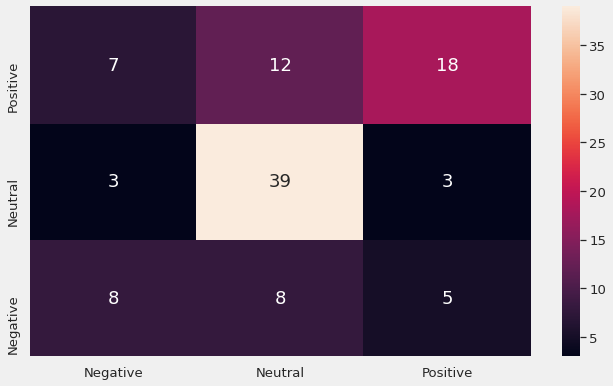

In [77]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [78]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [79]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [80]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.6358695652173912
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [82]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.5922330097087378
Precision Score:  0.5922330097087378
Recall Score:  0.5922330097087378
F1 Score:  0.5922330097087378


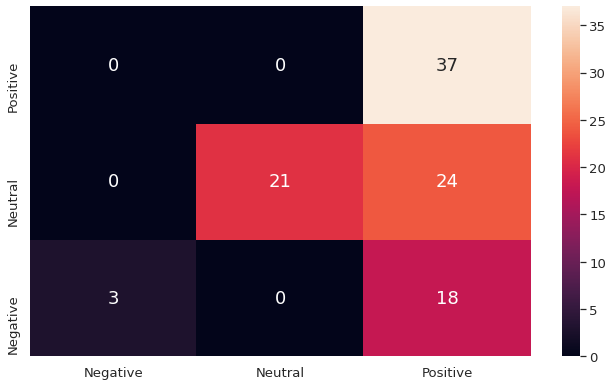

In [83]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [84]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [85]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6699029126213593
Precision Score:  0.6699029126213593
Recall Score:  0.6699029126213593
F1 Score:  0.6699029126213593


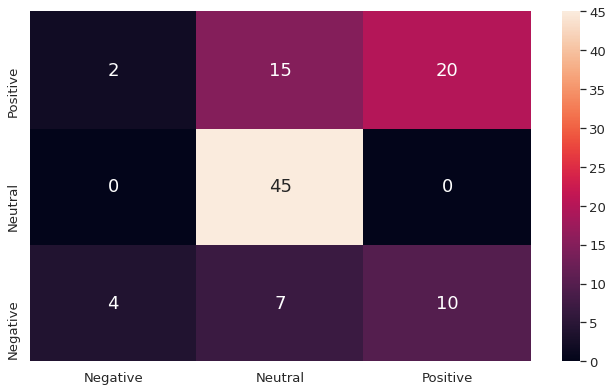

In [86]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [87]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [88]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, max_depth=2, criterion=entropy, score=0.562, total=   1.3s
[CV] n_estimators=900, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, max_depth=2, criterion=entropy, score=0.542, total=   1.3s
[CV] n_estimators=900, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=900, max_depth=2, criterion=entropy, score=0.583, total=   1.2s
[CV] n_estimators=900, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=900, max_depth=2, criterion=entropy, score=0.625, total=   1.3s
[CV] n_estimators=900, max_depth=2, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=900, max_depth=2, criterion=entropy, score=0.553, total=   1.2s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.646, total=   0.8s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.1s remaining:    0.0s


[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.625, total=   0.8s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.8s remaining:    0.0s


[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.646, total=   0.8s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.6s remaining:    0.0s


[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.667, total=   0.8s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.4s remaining:    0.0s


[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.617, total=   0.8s
[CV] n_estimators=700, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=16, criterion=entropy, score=0.646, total=   1.2s
[CV] n_estimators=700, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=16, criterion=entropy, score=0.667, total=   1.2s
[CV] n_estimators=700, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=16, criterion=entropy, score=0.646, total=   1.2s
[CV] n_estimators=700, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=16, criterion=entropy, score=0.708, total=   1.2s
[CV] n_estimators=700, max_depth=16, criterion=entropy ...............
[CV]  n_estimators=700, max_depth=16, criterion=entropy, score=0.596, total=   1.2s
[CV] n_estimators=600, max_depth=7, criterion=entropy ................
[CV]  n_estimators=600, max_depth=7, criterion=entropy, score=0.646, total

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.6s finished


0.6524822695035462
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [89]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6407766990291263
Precision Score:  0.6407766990291263
Recall Score:  0.6407766990291263
F1 Score:  0.6407766990291263


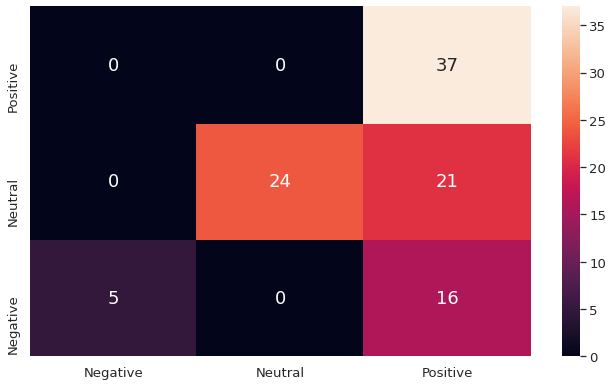

In [90]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [93]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.7475728155339806
Precision Score:  0.7475728155339806
Recall Score:  0.7475728155339806
F1 Score:  0.7475728155339806


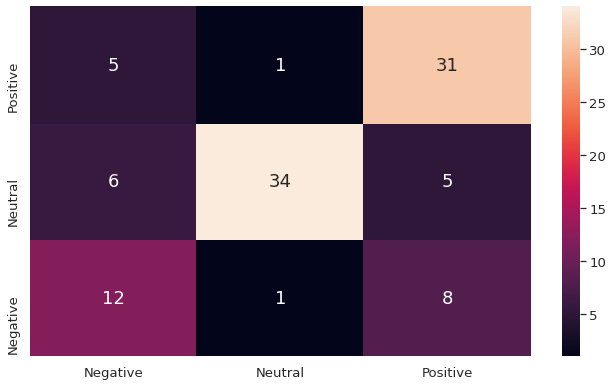

In [94]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [95]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [96]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6769927536231883
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [97]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.7475728155339806
Precision Score:  0.7475728155339806
Recall Score:  0.7475728155339806
F1 Score:  0.7475728155339806


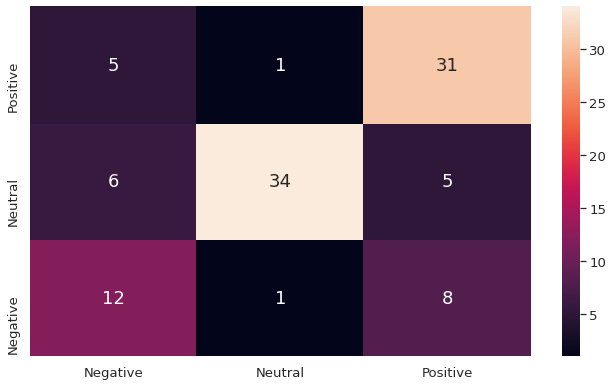

In [98]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

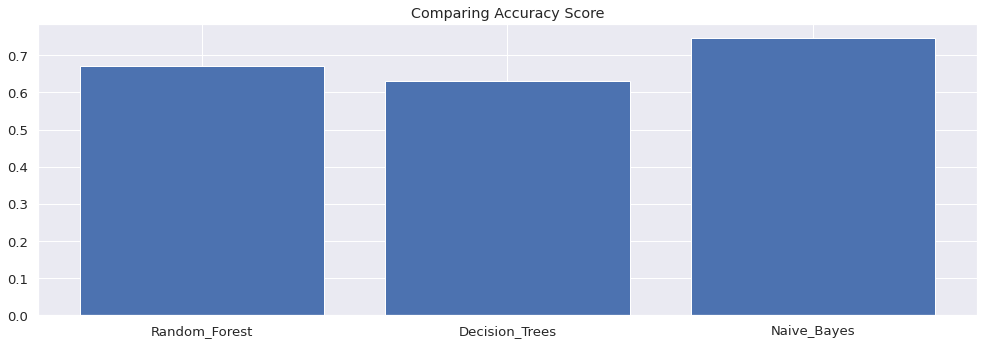

In [99]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

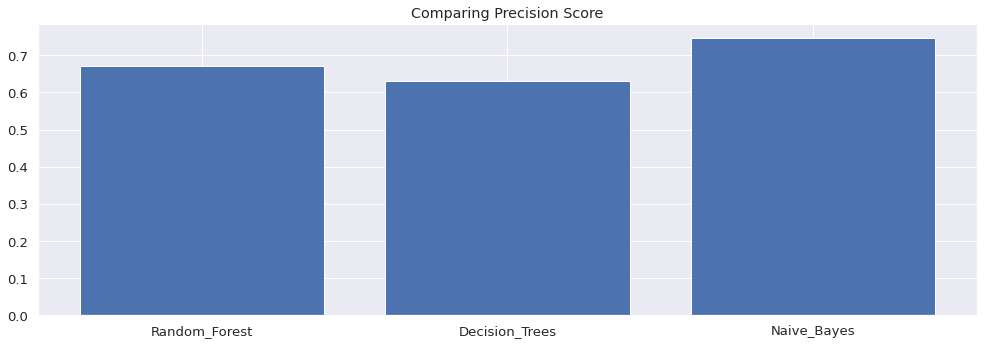

In [100]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

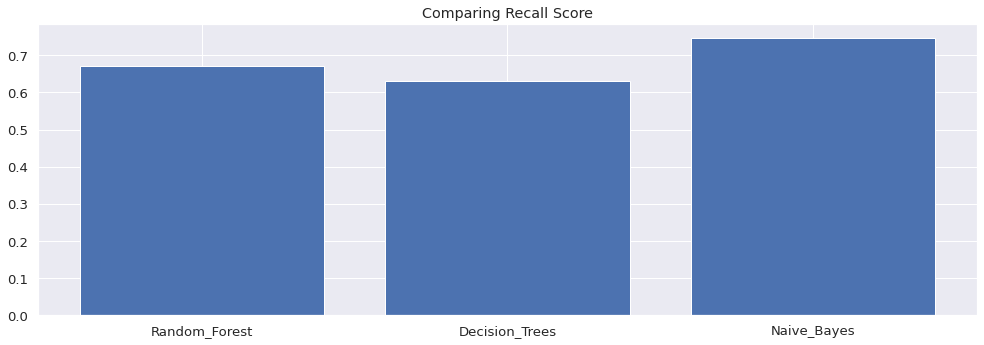

In [101]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

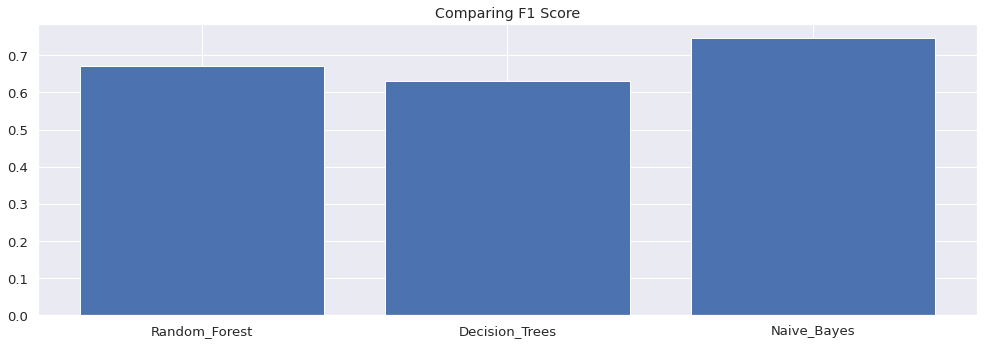

In [102]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()